# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data.
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [85]:
# !pip list

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [86]:
!pip install -U scikit-learn

In [87]:
# Data handling
import pandas as pd

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sb

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, Binarizer
from sklearn.compose import ColumnTransformer



# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Other packages
import os, pickle


import warnings
warnings.filterwarnings('ignore')

In [88]:
import sklearn

In [161]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [90]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [91]:
# Machine Learning
!pip install lazypredict



In [92]:
from sklearn.utils import shuffle

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

https://drive.google.com/file/d/10SVy2hoDReZ0_UYM3fw7LwvORxjhdUtT/view?usp=sharing

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [93]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("deepcontractor/unicorn-companies-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/deepcontractor/unicorn-companies-dataset/versions/1


In [94]:
# Liste des fichiers dans le dossier
files = os.listdir(path)
print("Fichiers dans le dossier :", files)


Fichiers dans le dossier : ['Unicorn_Companies.csv']


In [95]:
file_path = os.path.join(path, "Unicorn_Companies.csv")



In [96]:
df = pd.read_csv(file_path)

In [97]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0


In [98]:
df= pd.DataFrame(df)

In [99]:
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,$1,2/22/2022,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015.0,$181.06M,NaN,7.0,2.0,NaN
1033,Scalapay,$1,2/23/2022,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019.0,$700M,NaN,10.0,2.0,NaN
1034,Omada Health,$1,2/23/2022,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011.0,$449.72M,NaN,30.0,6.0,NaN
1035,BlueVoyant,$1,2/23/2022,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017.0,$525.5M,NaN,6.0,2.0,NaN


Observation : nous avons un jeu de donnees desequilibres dans la variable target "Class"

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1037 non-null   object 
 1   Valuation ($B)     1037 non-null   object 
 2   Date Joined        1037 non-null   object 
 3   Country            1037 non-null   object 
 4   City               1037 non-null   object 
 5   Industry           1037 non-null   object 
 6   Select Inverstors  1020 non-null   object 
 7   Founded Year       994 non-null    float64
 8   Total Raised       1013 non-null   object 
 9   Financial Stage    49 non-null     object 
 10  Investors Count    1036 non-null   float64
 11  Deal Terms         1008 non-null   float64
 12  Portfolio Exits    49 non-null     float64
dtypes: float64(4), object(9)
memory usage: 105.4+ KB


In [101]:
df.isna().sum()

,0
Company,0
Valuation ($B),0
Date Joined,0
Country,0
City,0
Industry,0
Select Inverstors,17
Founded Year,43
Total Raised,24
Financial Stage,988


In [102]:
df.duplicated().sum()

0

> * **Drop duplicate**

In [103]:
df.shape

(1037, 13)

In [104]:
df.drop_duplicates(inplace=True, keep="first")

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

# Remplacement des modalités

In [105]:
# Supposons que la colonne que vous voulez modifier soit 'Valuation ($B)'
# Enlever la première lettre (par exemple, '$' ou 'B') et transformer le reste en entier
df['Valuation ($B)'] = df['Valuation ($B)'].str[1:].astype(float)  # Suppression de la première lettre et conversion en float


In [106]:
# Affichage des résultats
print(df['Valuation ($B)'])

0       140.0
1       100.3
2        95.0
3        45.6
4        42.0
        ...  
1032      1.0
1033      1.0
1034      1.0
1035      1.0
1036      1.0
Name: Valuation ($B), Length: 1037, dtype: float64


In [107]:
# Convertir la colonne 'Date Joined' en type datetime
df['Date Joined'] = pd.to_datetime(df['Date Joined'], errors='coerce')

# Extraire l'année à partir de la date
df['Year Joined'] = df['Date Joined'].dt.year

In [108]:
# Affichage du résultat
print(df[['Company', 'Date Joined', 'Year Joined']])

           Company Date Joined  Year Joined
0        Bytedance  2017-04-07         2017
1           SpaceX  2012-12-01         2012
2           Stripe  2014-01-23         2014
3           Klarna  2011-12-12         2011
4       Epic Games  2018-10-26         2018
...            ...         ...          ...
1032     Timescale  2022-02-22         2022
1033      Scalapay  2022-02-23         2022
1034  Omada Health  2022-02-23         2022
1035    BlueVoyant  2022-02-23         2022
1036          Veev  2022-02-24         2022

[1037 rows x 3 columns]


In [109]:
# Séparer les modalités de la colonne 'Select Investors' par une virgule
investors_split = df['Select Inverstors'].str.split(',', expand=True)

# Donner des noms de colonnes explicites
investors_split.columns = [f'Investor_{i+1}' for i in range(investors_split.shape[1])]

# Concaténer les nouvelles colonnes avec le dataframe d'origine
df = pd.concat([df, investors_split], axis=1)

# Affichage du résultat
print(df[['Company', 'Select Inverstors'] + list(investors_split.columns)])


           Company                                  Select Inverstors  \
0        Bytedance  Sequoia Capital China, SIG Asia Investments, S...   
1           SpaceX  Founders Fund, Draper Fisher Jurvetson, Rothen...   
2           Stripe        Khosla Ventures, LowercaseCapital, capitalG   
3           Klarna  Institutional Venture Partners, Sequoia Capita...   
4       Epic Games              Tencent Holdings, KKR, Smash Ventures   
...            ...                                                ...   
1032     Timescale  New Enterprise Associates, Benchmark, Two Sigm...   
1033      Scalapay  Fasanara Capital, Tiger Global Management, Bal...   
1034  Omada Health  U.S. Venture Partners, dRx Capital, Andreessen...   
1035    BlueVoyant  8VC, Liberty Strategic Capital, Eden Global Pa...   
1036          Veev           Zeev Ventures, Bond, Fifth Wall Ventures   

                          Investor_1                  Investor_2  \
0              Sequoia Capital China        SIG Asia In

In [110]:
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Year Joined,Investor_1,Investor_2,Investor_3,Investor_4
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0,2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN,2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0,2014,Khosla Ventures,LowercaseCapital,capitalG,None
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0,2011,Institutional Venture Partners,Sequoia Capital,General Atlantic,None
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0,2018,Tencent Holdings,KKR,Smash Ventures,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,1.0,2022-02-22,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015.0,$181.06M,NaN,7.0,2.0,NaN,2022,New Enterprise Associates,Benchmark,Two Sigma Ventures,None
1033,Scalapay,1.0,2022-02-23,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019.0,$700M,NaN,10.0,2.0,NaN,2022,Fasanara Capital,Tiger Global Management,Baleen Capital,None
1034,Omada Health,1.0,2022-02-23,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011.0,$449.72M,NaN,30.0,6.0,NaN,2022,U.S. Venture Partners,dRx Capital,Andreessen Horowitz,None
1035,BlueVoyant,1.0,2022-02-23,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017.0,$525.5M,NaN,6.0,2.0,NaN,2022,8VC,Liberty Strategic Capital,Eden Global Partners,None


In [111]:
# Fonction pour convertir les valeurs avec des suffixes 'M' et 'B'
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Enlever les virgules
        if 'M' in value:  # Si c'est en millions
            return float(value.replace('M', '')) * 1e6  # Multiplier par 1 million
        elif 'B' in value:  # Si c'est en milliards
            return float(value.replace('B', '')) * 1e9  # Multiplier par 1 milliard
        elif 'K' in value:  # Si c'est en milles
            return float(value.replace('K', '')) * 1e3  # Multiplier par 1 milliard
        else:
            return float(value)  # Si c'est déjà un nombre, le convertir
    return value


In [112]:
# Nettoyage de la colonne 'Total Raised' pour enlever les symboles de devise
df['Total Raised'] = df['Total Raised'].replace({'\$': ''}, regex=True)


In [113]:
# Appliquer la fonction de conversion à la colonne 'Total Raised'
df['Total Raised'] = df['Total Raised'].apply(convert_to_numeric)

# Formatage de la colonne 'Total Raised' en monnaie (par exemple en dollars)
df['Total Raised'] = df['Total Raised'].apply(lambda x: f"{x:,.2f}")

# Affichage du résultat
print(df[['Company', 'Total Raised']])

           Company      Total Raised
0        Bytedance  7,440,000,000.00
1           SpaceX  6,874,000,000.00
2           Stripe  2,901,000,000.00
3           Klarna  3,472,000,000.00
4       Epic Games  4,377,000,000.00
...            ...               ...
1032     Timescale    181,060,000.00
1033      Scalapay    700,000,000.00
1034  Omada Health    449,720,000.00
1035    BlueVoyant    525,500,000.00
1036          Veev    604,500,000.00

[1037 rows x 2 columns]


## Dataset Splitting

In [114]:
df.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Select Inverstors', 'Founded Year', 'Total Raised',
       'Financial Stage', 'Investors Count', 'Deal Terms', 'Portfolio Exits',
       'Year Joined', 'Investor_1', 'Investor_2', 'Investor_3', 'Investor_4'],
      dtype='object')

In [115]:
cat_cols=df.select_dtypes(include='O').columns.tolist()
cat_cols.remove('Company')
cat_cols.remove('Select Inverstors')
cat_cols

['Country',
 'City',
 'Industry',
 'Total Raised',
 'Financial Stage',
 'Investor_1',
 'Investor_2',
 'Investor_3',
 'Investor_4']

In [116]:
num_cols=df.select_dtypes(exclude='O').columns.tolist()
num_cols.remove('Date Joined')
num_cols.remove('Valuation ($B)')
num_cols

['Founded Year',
 'Investors Count',
 'Deal Terms',
 'Portfolio Exits',
 'Year Joined']

In [117]:
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Year Joined,Investor_1,Investor_2,Investor_3,Investor_4
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,"7,440,000,000.00",IPO,28.0,8.0,5.0,2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,"6,874,000,000.00",NaN,29.0,12.0,NaN,2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,"2,901,000,000.00",Asset,39.0,12.0,1.0,2014,Khosla Ventures,LowercaseCapital,capitalG,None
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,"3,472,000,000.00",Acquired,56.0,13.0,1.0,2011,Institutional Venture Partners,Sequoia Capital,General Atlantic,None
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,"4,377,000,000.00",Acquired,25.0,5.0,2.0,2018,Tencent Holdings,KKR,Smash Ventures,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,1.0,2022-02-22,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015.0,"181,060,000.00",NaN,7.0,2.0,NaN,2022,New Enterprise Associates,Benchmark,Two Sigma Ventures,None
1033,Scalapay,1.0,2022-02-23,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019.0,"700,000,000.00",NaN,10.0,2.0,NaN,2022,Fasanara Capital,Tiger Global Management,Baleen Capital,None
1034,Omada Health,1.0,2022-02-23,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011.0,"449,720,000.00",NaN,30.0,6.0,NaN,2022,U.S. Venture Partners,dRx Capital,Andreessen Horowitz,None
1035,BlueVoyant,1.0,2022-02-23,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017.0,"525,500,000.00",NaN,6.0,2.0,NaN,2022,8VC,Liberty Strategic Capital,Eden Global Partners,None


In [118]:
# Exporter le dataframe modifié dans un fichier CSV
df.to_csv('licornes_modifiees.csv', index=False)

# Confirmation de l'export
print("Fichier exporté sous le nom 'licornes_modifiees.csv'.")

Fichier exporté sous le nom 'licornes_modifiees.csv'.


In [119]:
target_col = 'Valuation ($B)'

In [120]:
X = df[num_cols+cat_cols]
y = df[[target_col]]


In [121]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Valuation ($B)  1037 non-null   float64
dtypes: float64(1)
memory usage: 8.2 KB


In [122]:
df[num_cols].corr()

,Founded Year,Investors Count,Deal Terms,Portfolio Exits,Year Joined
Founded Year,1.000000,0.116486,-0.155746,0.006456,0.363195
Investors Count,0.116486,1.000000,0.408909,-0.053227,-0.023633
Deal Terms,-0.155746,0.408909,1.000000,0.104690,-0.282436
Portfolio Exits,0.006456,-0.053227,0.104690,1.000000,-0.048859
Year Joined,0.363195,-0.023633,-0.282436,-0.048859,1.000000


In [123]:
df.describe()

,Valuation ($B),Date Joined,Founded Year,Investors Count,Deal Terms,Portfolio Exits,Year Joined
count,1037.000000,1037,994.000000,1036.000000,1008.000000,49.000000,1037.000000
mean,3.292083,2020-04-25 06:44:05.323047168,2012.710262,14.432432,3.093254,1.346939,2019.820636
min,1.000000,2007-07-20 00:00:00,1919.000000,1.000000,1.000000,1.000000,2007.000000
25%,1.080000,2019-04-23 00:00:00,2011.000000,8.000000,1.000000,1.000000,2019.000000
50%,1.600000,2021-03-17 00:00:00,2014.000000,13.000000,3.000000,1.000000,2021.000000
75%,3.100000,2021-09-08 00:00:00,2016.000000,19.000000,4.000000,1.000000,2021.000000
max,140.000000,2022-02-28 00:00:00,2021.000000,91.000000,19.000000,5.000000,2022.000000
std,7.309781,NaN,5.942876,9.946537,2.159764,0.751416,1.999189


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            1037 non-null   object        
 1   Valuation ($B)     1037 non-null   float64       
 2   Date Joined        1037 non-null   datetime64[ns]
 3   Country            1037 non-null   object        
 4   City               1037 non-null   object        
 5   Industry           1037 non-null   object        
 6   Select Inverstors  1020 non-null   object        
 7   Founded Year       994 non-null    float64       
 8   Total Raised       1037 non-null   object        
 9   Financial Stage    49 non-null     object        
 10  Investors Count    1036 non-null   float64       
 11  Deal Terms         1008 non-null   float64       
 12  Portfolio Exits    49 non-null     float64       
 13  Year Joined        1037 non-null   int32         
 14  Investor

In [125]:
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Year Joined,Investor_1,Investor_2,Investor_3,Investor_4
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,"7,440,000,000.00",IPO,28.0,8.0,5.0,2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,"6,874,000,000.00",NaN,29.0,12.0,NaN,2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,"2,901,000,000.00",Asset,39.0,12.0,1.0,2014,Khosla Ventures,LowercaseCapital,capitalG,None
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,"3,472,000,000.00",Acquired,56.0,13.0,1.0,2011,Institutional Venture Partners,Sequoia Capital,General Atlantic,None
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,"4,377,000,000.00",Acquired,25.0,5.0,2.0,2018,Tencent Holdings,KKR,Smash Ventures,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,1.0,2022-02-22,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015.0,"181,060,000.00",NaN,7.0,2.0,NaN,2022,New Enterprise Associates,Benchmark,Two Sigma Ventures,None
1033,Scalapay,1.0,2022-02-23,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019.0,"700,000,000.00",NaN,10.0,2.0,NaN,2022,Fasanara Capital,Tiger Global Management,Baleen Capital,None
1034,Omada Health,1.0,2022-02-23,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011.0,"449,720,000.00",NaN,30.0,6.0,NaN,2022,U.S. Venture Partners,dRx Capital,Andreessen Horowitz,None
1035,BlueVoyant,1.0,2022-02-23,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017.0,"525,500,000.00",NaN,6.0,2.0,NaN,2022,8VC,Liberty Strategic Capital,Eden Global Partners,None


# Splitting

In [126]:
# Use train_test_split with a random_state, and add stratify for Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42 )

In [127]:
X_train.shape, y_train.shape

((725, 14), (725, 1))

In [128]:
X_test.shape, y_test.shape

((312, 14), (312, 1))

## Impute Missing Values

In [129]:
# Use sklearn.impute.SimpleImputer

In [130]:
print(X_train[num_cols].isna().sum()/X_train.shape[0]) # [0, 1]

Founded Year       0.037241
Investors Count    0.001379
Deal Terms         0.023448
Portfolio Exits    0.951724
Year Joined        0.000000
dtype: float64


In [131]:
num_imputer = SimpleImputer(strategy="mean").fit(X_train[num_cols])
cat_imputer = SimpleImputer(strategy="most_frequent").fit(X_train[cat_cols])

In [132]:
X_train[num_cols]

,Founded Year,Investors Count,Deal Terms,Portfolio Exits,Year Joined
361,2015.0,6.0,3.0,NaN,2018
196,2014.0,10.0,6.0,NaN,2018
1005,2020.0,13.0,1.0,NaN,2021
81,NaN,2.0,1.0,NaN,2019
707,2017.0,5.0,1.0,NaN,2021
...,...,...,...,...,...
87,2017.0,27.0,5.0,NaN,2020
330,2015.0,16.0,2.0,NaN,2021
466,2000.0,2.0,1.0,NaN,2021
121,2011.0,22.0,4.0,1.0,2021


In [133]:
num_imputer.fit_transform(X_train[num_cols]) # numpy array as output

array([[2.015e+03, 6.000e+00, 3.000e+00, 1.400e+00, 2.018e+03],
       [2.014e+03, 1.000e+01, 6.000e+00, 1.400e+00, 2.018e+03],
       [2.020e+03, 1.300e+01, 1.000e+00, 1.400e+00, 2.021e+03],
       ...,
       [2.000e+03, 2.000e+00, 1.000e+00, 1.400e+00, 2.021e+03],
       [2.011e+03, 2.200e+01, 4.000e+00, 1.000e+00, 2.021e+03],
       [2.006e+03, 3.000e+00, 1.000e+00, 1.400e+00, 2.020e+03]])

In [134]:
X_train[num_cols].shape

(725, 5)

In [135]:
X_train_num_imputed = pd.DataFrame(num_imputer.transform(X_train[num_cols]), columns=num_cols)
X_test_num_imputed = pd.DataFrame(num_imputer.transform(X_test[num_cols]), columns=num_cols)

X_train_cat_imputed = pd.DataFrame(cat_imputer.transform(X_train[cat_cols]), columns=cat_cols)
X_test_cat_imputed = pd.DataFrame(cat_imputer.transform(X_test[cat_cols]), columns=cat_cols)

X_train_imputed = pd.concat([X_train_num_imputed, X_train_cat_imputed], axis=1)
X_test_imputed = pd.concat([X_test_num_imputed, X_test_cat_imputed], axis=1)

In [136]:
X_train_imputed.head()

,Founded Year,Investors Count,Deal Terms,Portfolio Exits,Year Joined,Country,City,Industry,Total Raised,Financial Stage,Investor_1,Investor_2,Investor_3,Investor_4
0,2015.000000,6.0,3.0,1.4,2018.0,United States,Mountain View,Consumer & retail,"445,690,000.00",Acquired,Softbank Group,AME Cloud Ventures,SignalFire,None
1,2014.000000,10.0,6.0,1.4,2018.0,China,Chengdu,Health,"764,740,000.00",Acquired,China Health Industry Investment Fund,China Renaissance,and Sequoia Capital China,None
2,2020.000000,13.0,1.0,1.4,2021.0,Germany,Berlin,E-commerce & direct-to-consumer,"766,700,000.00",Acquired,Cherry Ventures,Felix Capital,83North,None
3,2012.905444,2.0,1.0,1.4,2019.0,United States,Pittsburgh,Artificial intelligence,"500,000,000.00",Acquired,Volkswagen Group,Ford Autonomous Vehicles,None,None
4,2017.000000,5.0,1.0,1.4,2021.0,United States,San Francisco,Internet software & services,"146,000,000.00",Acquired,Accel,Greylock Partners,Meritech Capital Partners,None


## New Features Creation

In [137]:
# Code here

## Features Encoding




In [138]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

In [139]:
# Concaténer les données d'entraînement, de validation et de test
X_cat = pd.concat([X_train_cat_imputed, X_test_cat_imputed])

# Entraîner l'encodeur OneHot sur les données concaténées
encoder = OneHotEncoder(drop="first", sparse_output=False).fit(X_cat)

# Obtenir les noms des colonnes encodées
cat_encoded_cols = encoder.get_feature_names_out().tolist()

In [140]:
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat_imputed), columns=cat_encoded_cols)
X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test_cat_imputed), columns=cat_encoded_cols)

In [141]:
X_train_cat_encoded.head()

,Country_Australia,Country_Austria,Country_Bahamas,Country_Belgium,Country_Bermuda,Country_Brazil,Country_Canada,Country_Chile,Country_China,Country_Colombia,...,Investor_3_None,Investor_4_ Goldman Sachs,Investor_4_ McKesson Ventures,Investor_4_ Redpoint Ventures,Investor_4_ Redpoint e.ventures,Investor_4_ SDIC CMC Investment Management,Investor_4_ Softbank Group,Investor_4_ Spark Capital,Investor_4_/td>,Investor_4_None
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Features Scaling


In [142]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.

In [143]:
scaler = StandardScaler().fit(X_train_num_imputed)

In [144]:
X_train_num_scaled = pd.DataFrame(scaler.transform(X_train_num_imputed), columns=num_cols)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num_imputed), columns=num_cols)

In [145]:
X_train_num_scaled.head()

,Founded Year,Investors Count,Deal Terms,Portfolio Exits,Year Joined
0,0.423722,-0.844908,-0.043980,-1.210359e-15,-0.948400
1,0.221425,-0.443719,1.350257,-1.210359e-15,-0.948400
2,1.435206,-0.142827,-0.973472,-1.210359e-15,0.582981
3,0.000000,-1.246097,-0.973472,-1.210359e-15,-0.437940
4,0.828316,-0.945205,-0.973472,-1.210359e-15,0.582981


## Association of numeric and categorical variables

In [146]:
X_train_ready = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_ready = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [147]:
X_train_ready.head()

,Founded Year,Investors Count,Deal Terms,Portfolio Exits,Year Joined,Country_Australia,Country_Austria,Country_Bahamas,Country_Belgium,Country_Bermuda,...,Investor_3_None,Investor_4_ Goldman Sachs,Investor_4_ McKesson Ventures,Investor_4_ Redpoint Ventures,Investor_4_ Redpoint e.ventures,Investor_4_ SDIC CMC Investment Management,Investor_4_ Softbank Group,Investor_4_ Spark Capital,Investor_4_/td>,Investor_4_None
0,0.423722,-0.844908,-0.043980,-1.210359e-15,-0.948400,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.221425,-0.443719,1.350257,-1.210359e-15,-0.948400,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.435206,-0.142827,-0.973472,-1.210359e-15,0.582981,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,-1.246097,-0.973472,-1.210359e-15,-0.437940,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.828316,-0.945205,-0.973472,-1.210359e-15,0.582981,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [148]:
X_test_ready.head()

,Founded Year,Investors Count,Deal Terms,Portfolio Exits,Year Joined,Country_Australia,Country_Austria,Country_Bahamas,Country_Belgium,Country_Bermuda,...,Investor_3_None,Investor_4_ Goldman Sachs,Investor_4_ McKesson Ventures,Investor_4_ Redpoint Ventures,Investor_4_ Redpoint e.ventures,Investor_4_ SDIC CMC Investment Management,Investor_4_ Softbank Group,Investor_4_ Spark Capital,Investor_4_/td>,Investor_4_None
0,0.221425,-0.443719,0.000000,-1.210359e-15,-0.948400,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-2.408434,0.057768,-0.508726,-2.180389e+00,-1.969320,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.626019,-0.443719,-0.043980,-1.210359e-15,0.582981,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.221425,-0.343421,-0.508726,-1.210359e-15,0.582981,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.458957,-0.973472,-1.210359e-15,0.582981,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [149]:
from sklearn.preprocessing import LabelEncoder

# Créer un objet LabelEncoder
encoder = LabelEncoder()

# Encoder la variable cible y_train
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
# Afficher les étiquettes encodées
print(encoder.classes_)
print(y_train)

# Compter le nombre d'occurrences de chaque classe
admis = (y_train == 0).sum()
rejeté = (y_train == 1).sum()
print("Nombre d'admis :", admis)
print("Nombre de rejetés :", rejeté)


[ 1.    1.01  1.03  1.05  1.07  1.1   1.12  1.13  1.15  1.16  1.2   1.23
  1.24  1.25  1.28  1.29  1.3   1.31  1.32  1.33  1.35  1.4   1.43  1.44
  1.45  1.5   1.52  1.6   1.62  1.63  1.68  1.7   1.73  1.8   1.95  2.
  2.1   2.2   2.25  2.27  2.3   2.31  2.32  2.34  2.4   2.45  2.5   2.6
  2.7   2.74  2.75  2.85  2.9   2.92  3.    3.1   3.15  3.2   3.24  3.31
  3.35  3.4   3.5   3.52  3.6   3.7   3.8   3.95  4.    4.2   4.25  4.58
  5.    5.2   5.25  5.3   5.7   5.77  5.99  6.    6.1   6.28  6.3   6.5
  6.8   7.    7.1   7.25  7.4   7.5   7.83  8.    8.1   8.3   8.4   8.7
  8.75  9.    9.08  9.5  10.   10.88 11.7  12.   13.   13.4  32.   33.
 40.   45.6  95.  ]
[ 54  86   0 122  13  34  20  76  62  82   6   0   0  81   0  48   0  87
   0   0   0  34  40  31 156  95  31  40  62  31  44   0  26  36  26   6
   0   0   0  26   0   0   0  81  47   5  82 124  98  67  50  53  25   0
 137  31 103  28  65  40   0  20   0 160  40  63   6  13  23   0   0  31
  90 103  47   0  28   0 119   0  87  

In [150]:
X_train_ready.corr()

,Founded Year,Investors Count,Deal Terms,Portfolio Exits,Year Joined,Country_Australia,Country_Austria,Country_Bahamas,Country_Belgium,Country_Bermuda,...,Investor_3_None,Investor_4_ Goldman Sachs,Investor_4_ McKesson Ventures,Investor_4_ Redpoint Ventures,Investor_4_ Redpoint e.ventures,Investor_4_ SDIC CMC Investment Management,Investor_4_ Softbank Group,Investor_4_ Spark Capital,Investor_4_/td>,Investor_4_None
Founded Year,1.000000,0.077379,-0.176312,-5.779747e-03,0.339272,-2.494399e-02,2.760565e-02,NaN,-1.495370e-02,-5.191722e-02,...,-0.149977,7.108997e-04,-6.807403e-03,NaN,1.574751e-02,NaN,-0.006807,1.574751e-02,7.108997e-04,-0.010449
Investors Count,0.077379,1.000000,0.426713,1.417696e-02,-0.019079,1.177331e-02,-1.014957e-02,NaN,-3.916292e-02,-1.649067e-02,...,-0.274554,5.874448e-03,2.146928e-03,NaN,7.669733e-02,NaN,0.050605,2.823957e-02,-3.512827e-02,-0.045317
Deal Terms,-0.176312,0.426713,1.000000,5.101575e-02,-0.262075,4.864829e-02,-1.453483e-02,NaN,-5.119990e-02,-1.634510e-03,...,-0.151668,-1.634510e-03,1.563763e-02,NaN,3.290976e-02,NaN,0.084726,3.290976e-02,-3.617878e-02,-0.054657
Portfolio Exits,-0.005780,0.014177,0.051016,1.000000e+00,-0.044520,-6.454255e-19,2.167342e-18,NaN,-1.276896e-18,-1.931025e-19,...,-0.017592,-2.575730e-19,7.578372e-19,NaN,5.483081e-19,NaN,0.729302,-1.047336e-18,7.578372e-19,-0.276800
Year Joined,0.339272,-0.019079,-0.262075,-4.452007e-02,1.000000,2.441214e-02,3.066197e-02,NaN,4.408583e-02,-5.421810e-02,...,-0.234917,-1.627590e-02,2.166630e-02,NaN,-3.524700e-02,NaN,-0.054218,-5.421810e-02,2.166630e-02,0.036041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Investor_4_ SDIC CMC Investment Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor_4_ Softbank Group,-0.006807,0.050605,0.084726,7.293018e-01,-0.054218,-2.768172e-03,-1.954684e-03,NaN,-1.954684e-03,-1.381215e-03,...,-0.014693,-1.381215e-03,-1.381215e-03,NaN,-1.381215e-03,NaN,1.000000,-1.381215e-03,-1.381215e-03,-0.376395
Investor_4_ Spark Capital,0.015748,0.028240,0.032910,-1.047336e-18,-0.054218,-2.768172e-03,-1.954684e-03,NaN,-1.954684e-03,-1.381215e-03,...,-0.014693,-1.381215e-03,-1.381215e-03,NaN,-1.381215e-03,NaN,-0.001381,1.000000e+00,-1.381215e-03,-0.376395
Investor_4_/td>,0.000711,-0.035128,-0.036179,7.578372e-19,0.021666,-2.768172e-03,-1.954684e-03,NaN,-1.954684e-03,-1.381215e-03,...,-0.014693,-1.381215e-03,-1.381215e-03,NaN,-1.381215e-03,NaN,-0.001381,-1.381215e-03,1.000000e+00,-0.376395


# Machine Learning Modeling
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

### Entrainement du plusieurs modeles avec une boucle FOR

In [156]:
# 1- un dictionnaire de modeles
# 2- un dictionnaire de resultat

In [158]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor

# Liste des modèles pour la régression
liste_model = [
    {"nom": "Régression linéaire", "model": LinearRegression()},
    {"nom": "Forêt aléatoire", "model": RandomForestRegressor()},
    {"nom": "SVM", "model": SVR()},
    {"nom": "K plus proches voisins", "model": KNeighborsRegressor()},
    {"nom": "Ridge", "model": Ridge()},
    {"nom": "Arbre de décision", "model": DecisionTreeRegressor()},
    {"nom": "Boosting de gradient", "model": GradientBoostingRegressor()},
    {"nom": "Réseau de neurones", "model": MLPRegressor()},
    {"nom": "AdaBoost", "model": AdaBoostRegressor()},
    {"nom": "Voting Regressor", "model": VotingRegressor([('rf', RandomForestRegressor()), ('svc', SVR()), ('knn', KNeighborsRegressor())])},
    {"nom": "Stacking Regressor", "model": StackingRegressor(estimators=[('rf', RandomForestRegressor()), ('svc', SVR()), ('knn', KNeighborsRegressor())], final_estimator=LinearRegression())},
    {"nom": "Ridge Regressor", "model": Ridge()},
    {"nom": "SGD Regressor", "model": SGDRegressor()},
    {"nom": "XGBoost", "model": XGBRegressor()}
]


In [159]:
# liste de resultat
liste_resultat= []

In [162]:
# Sélection du meilleur modèle
for model in liste_model:
    model['model'].fit(X_train_ready, y_train)
    y_test_pred_ = model['model'].predict(X_test_ready)
    print('='*30)
    # calcul des métriques
    print(f"Model Train:{model['nom']}")
    print("mean_squared_error: ", mean_squared_error(y_test, y_test_pred_))
    print("r2_score: ", r2_score(y_test, y_test_pred_))
    print('='*30)

Model Train:Régression linéaire
mean_squared_error:  1281.1315122923536
r2_score:  -0.3450337124585019
Model Train:Forêt aléatoire
mean_squared_error:  821.7733580128205
r2_score:  0.1372369971996743
Model Train:SVM
mean_squared_error:  831.0908684604472
r2_score:  0.12745473398313867
Model Train:K plus proches voisins
mean_squared_error:  994.4128205128205
r2_score:  -0.044013635491207515
Model Train:Ridge
mean_squared_error:  1111.0718220089802
r2_score:  -0.16649152973433567
Model Train:Arbre de décision
mean_squared_error:  1776.5448717948718
r2_score:  -0.8651580429738768
Model Train:Boosting de gradient
mean_squared_error:  770.410119011612
r2_score:  0.1911622089166768
Model Train:Réseau de neurones
mean_squared_error:  1248.805731190995
r2_score:  -0.31109553753602004
Model Train:AdaBoost
mean_squared_error:  847.3020349374166
r2_score:  0.11043496261650854
Model Train:Voting Regressor
mean_squared_error:  714.6918336040546
r2_score:  0.2496596945803088
Model Train:Stacking Reg

In [163]:
import joblib  # pour l'exportation du modèle

In [164]:
# Exporter le modèle avec joblib
joblib.dump(model, 'gradient_boosting_model.pkl')

print("Modèle exporté avec succès sous le nom 'gradient_boosting_model.pkl'")


Modèle exporté avec succès sous le nom 'gradient_boosting_model.pkl'


**CLUSTERING**

In [165]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns



In [166]:
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Year Joined,Investor_1,Investor_2,Investor_3,Investor_4
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,"7,440,000,000.00",IPO,28.0,8.0,5.0,2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,"6,874,000,000.00",NaN,29.0,12.0,NaN,2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,"2,901,000,000.00",Asset,39.0,12.0,1.0,2014,Khosla Ventures,LowercaseCapital,capitalG,None
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,"3,472,000,000.00",Acquired,56.0,13.0,1.0,2011,Institutional Venture Partners,Sequoia Capital,General Atlantic,None
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,"4,377,000,000.00",Acquired,25.0,5.0,2.0,2018,Tencent Holdings,KKR,Smash Ventures,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,1.0,2022-02-22,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015.0,"181,060,000.00",NaN,7.0,2.0,NaN,2022,New Enterprise Associates,Benchmark,Two Sigma Ventures,None
1033,Scalapay,1.0,2022-02-23,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019.0,"700,000,000.00",NaN,10.0,2.0,NaN,2022,Fasanara Capital,Tiger Global Management,Baleen Capital,None
1034,Omada Health,1.0,2022-02-23,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011.0,"449,720,000.00",NaN,30.0,6.0,NaN,2022,U.S. Venture Partners,dRx Capital,Andreessen Horowitz,None
1035,BlueVoyant,1.0,2022-02-23,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017.0,"525,500,000.00",NaN,6.0,2.0,NaN,2022,8VC,Liberty Strategic Capital,Eden Global Partners,None


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            1037 non-null   object        
 1   Valuation ($B)     1037 non-null   float64       
 2   Date Joined        1037 non-null   datetime64[ns]
 3   Country            1037 non-null   object        
 4   City               1037 non-null   object        
 5   Industry           1037 non-null   object        
 6   Select Inverstors  1020 non-null   object        
 7   Founded Year       994 non-null    float64       
 8   Total Raised       1037 non-null   object        
 9   Financial Stage    49 non-null     object        
 10  Investors Count    1036 non-null   float64       
 11  Deal Terms         1008 non-null   float64       
 12  Portfolio Exits    49 non-null     float64       
 13  Year Joined        1037 non-null   int32         
 14  Investor

In [201]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Exemple de DataFrame 'df'
# df = pd.DataFrame(...)  # Remplacer par votre DataFrame

# 1. Identifier les colonnes catégorielles et numériques
categorical_columns = df.select_dtypes(include=['object']).columns  # Variables catégorielles
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Variables numériques

# 2. Pipeline pour traiter les variables catégorielles
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Remplacer les valeurs manquantes par la valeur la plus fréquente
    ('encoder', OneHotEncoder(sparse_output=False, drop='first'))  # Encodage OneHot (drop='first' pour éviter la multicolinéarité)
])

# 3. Pipeline pour traiter les variables numériques
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Remplacer les valeurs manquantes par la moyenne
    ('scaler', StandardScaler())  # Mise à l'échelle des variables numériques
])

# 4. Combinaison des deux pipelines dans un transformer global
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_columns),  # Traiter les colonnes numériques
        ('cat', categorical_pipeline, categorical_columns)  # Traiter les colonnes catégorielles
    ])

# 5. Appliquer le préprocesseur aux données
df_processed = preprocessor.fit_transform(df)  # Transformation des données

# Convertir le résultat en DataFrame
df_processed = pd.DataFrame(df_processed, columns=preprocessor.get_feature_names_out())

# Afficher le DataFrame transformé
print(df_processed.head())


   num__Company  num__Valuation ($B)  num__Date Joined  num__Country  \
0     -1.299769            18.711078         -1.545403     -1.484817   
1      1.009271            13.277378         -3.747810      0.811465   
2      1.072854            12.551972         -3.168083      0.811465   
3     -0.121824             5.790643         -4.240161      0.417816   
4     -0.774379             5.297915         -0.759027      0.811465   

   num__City  num__Industry  num__Select Inverstors  num__Founded Year  \
0  -1.643494      -1.642510                0.858837          -0.122134   
1  -0.535997       1.325698               -0.665814          -1.841697   
2   0.841622      -0.236517                0.040483          -0.466047   
3   1.138755      -0.236517               -0.108926          -1.325828   
4  -1.278830       1.325698                1.256129          -3.733216   

   num__Total Raised  num__Financial Stage  num__Investors Count  \
0           1.256965             -2.483701            

In [203]:
df_processed.columns

Index(['num__Company', 'num__Valuation ($B)', 'num__Date Joined',
       'num__Country', 'num__City', 'num__Industry', 'num__Select Inverstors',
       'num__Founded Year', 'num__Total Raised', 'num__Financial Stage',
       'num__Investors Count', 'num__Deal Terms', 'num__Portfolio Exits',
       'num__Investor_1', 'num__Investor_2', 'num__Investor_3',
       'num__Investor_4'],
      dtype='object')

In [204]:
# Appliquer le KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # choisir n_clusters selon votre analyse

# Convert all column names to strings before fitting the model
df_processed.columns = df_processed.columns.astype(str)

#Fit the KMeans model to the original DataFrame 'df' instead of 'X'
kmeans.fit(df_processed)

# Ajouter les labels des clusters au DataFrame
df_processed['Cluster'] = kmeans.labels_

In [205]:
df_processed

,num__Company,num__Valuation ($B),num__Date Joined,num__Country,num__City,num__Industry,num__Select Inverstors,num__Founded Year,num__Total Raised,num__Financial Stage,num__Investors Count,num__Deal Terms,num__Portfolio Exits,num__Investor_1,num__Investor_2,num__Investor_3,num__Investor_4,Cluster
0,-1.299769,18.711078,-1.545403,-1.484817,-1.643494,-1.642510,0.858837,-0.122134,1.256965,-2.483701,1.365367,2.305483,2.259672e+01,0.898567,0.762819,0.677650,-5.516009,2
1,1.009271,13.277378,-3.747810,0.811465,-0.535997,1.325698,-0.665814,-1.841697,1.017985,0.211849,1.466001,4.184922,1.373500e-15,-0.535686,-0.834430,0.486143,0.050097,2
2,1.072854,12.551972,-3.168083,0.811465,0.841622,-0.236517,0.040483,-0.466047,-0.878920,-4.505363,2.472347,4.184922,-2.146057e+00,0.016438,0.095397,1.308497,0.050097,2
3,-0.121824,5.790643,-4.240161,0.417816,1.138755,-0.236517,-0.108926,-1.325828,-0.255332,-5.179251,4.183135,4.654782,-2.146057e+00,-0.135872,0.814159,-0.679796,0.050097,2
4,-0.774379,5.297915,-0.759027,0.811465,-1.278830,1.325698,1.256129,-3.733216,0.271172,-5.179251,1.063463,0.895903,4.039636e+00,1.247611,-0.092850,0.705813,0.050097,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,1.179940,-0.313715,0.926064,0.811465,0.355403,0.544591,0.376653,0.393735,-1.039485,0.211849,-0.747960,-0.513676,1.373500e-15,0.365482,-1.296491,1.066297,0.050097,1
1033,0.851989,-0.313715,0.927451,-0.566304,0.193331,-0.236517,-0.743915,1.081560,1.268167,0.211849,-0.446056,-0.513676,1.373500e-15,-0.630880,1.179245,-1.457089,0.050097,0
1034,0.410259,-0.313715,0.927451,0.811465,0.841622,0.232148,1.412329,-0.294090,0.498950,0.211849,1.566636,1.365763,1.373500e-15,1.355497,1.498694,-1.581005,0.050097,1
1035,-1.346619,-0.313715,0.927451,0.811465,0.355403,-1.017624,-1.715073,0.737647,0.790207,0.211849,-0.848594,-0.513676,1.373500e-15,-1.690704,0.032648,-0.972689,0.050097,0


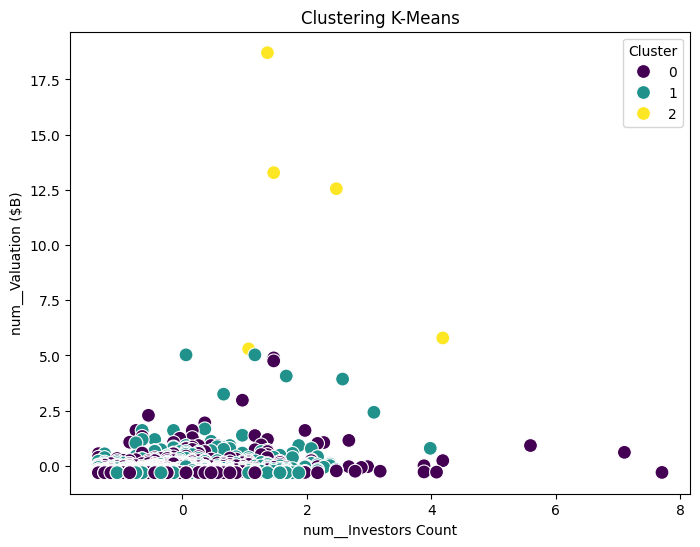

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que 'X' est votre DataFrame avec les données de clustering et 'Cluster' est ajouté

# Visualisation des clusters (par exemple, en utilisant les deux premières caractéristiques)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_processed['num__Investors Count'], y=df_processed['num__Valuation ($B)'], hue=df_processed['Cluster'], palette="viridis", s=100)
plt.title("Clustering K-Means")
plt.show()


In [209]:
from sklearn.cluster import DBSCAN

# Appliquer DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # ajustez eps et min_samples en fonction de vos données
dbscan.fit(df_processed)

# Ajouter les labels des clusters au DataFrame
df_processed['DBSCAN_Cluster'] = dbscan.labels_

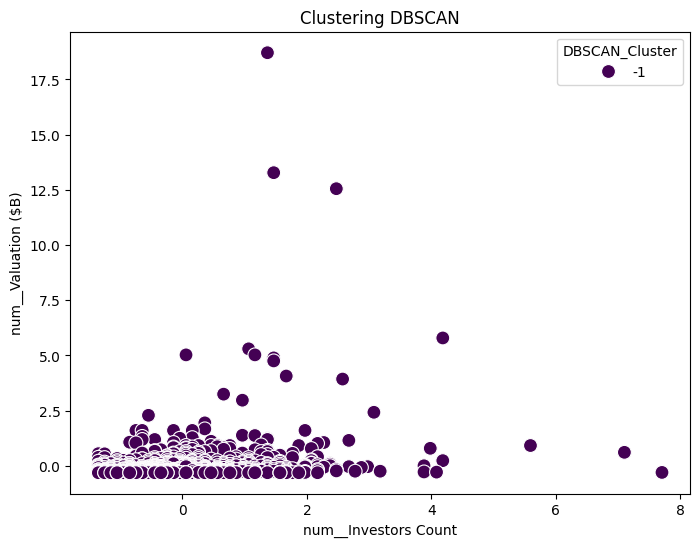

Number of clusters found:  0
Clusters: {-1}


In [210]:
# Visualiser les clusters en fonction de 'Valuation ($B)' et 'Investors Count'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_processed['num__Investors Count'], y=df_processed['num__Valuation ($B)'], hue=df_processed['DBSCAN_Cluster'], palette="viridis", s=100)
plt.title("Clustering DBSCAN")
plt.show()

# Afficher le nombre de clusters trouvés
print("Number of clusters found: ", len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0))
print("Clusters:", set(dbscan.labels_))


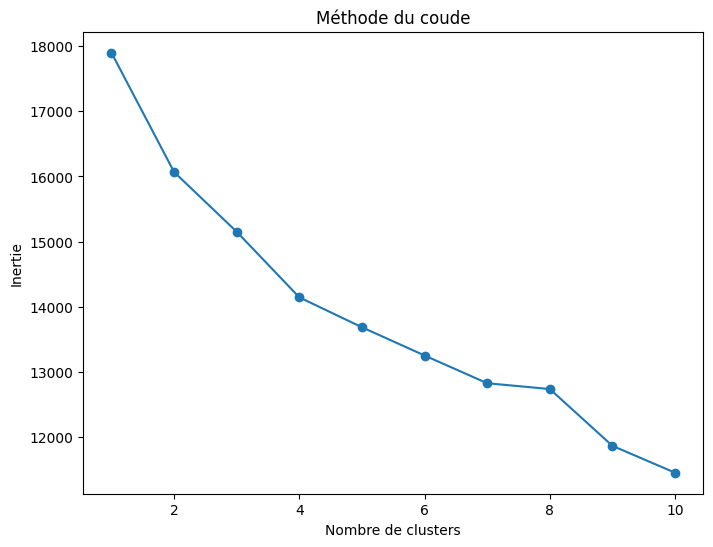

In [211]:
# Méthode du coude pour déterminer le nombre optimal de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_processed)
    inertia.append(kmeans.inertia_)

# Visualisation de la méthode du coude
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()
